## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/USA_cars_datasets.csv',low_memory=False)
df = df.loc[:,['price','year','mileage']]

In [2]:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [3]:
df.shape

(2499, 3)

In [4]:
print(df['price'].value_counts())
print(df['year'].value_counts())
print(df['mileage'].value_counts())

price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64
year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64
mileage
1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: count, Length: 2439, dtype: int64


In [5]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


> All 3 columns have the same count number, which is equal to the number of oberservations. No NAs exist

2. Maxmin normalize `year` and `mileage`.

In [2]:
# creates a function that returns a normalized set of data
def maxmin(x):
    return (x-min(x))/(max(x)-min(x))

# call maxmin on year and mileage
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

3. Split the sample into ~80% for training and ~20% for evaluation.

In [3]:
# imports test train split from scikit
from sklearn.model_selection import train_test_split

# assigns X to normalized variables and Y to price
X = df[['year','mileage']]
Y = df['price']

# splits data 80/20 and ensures replicability
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

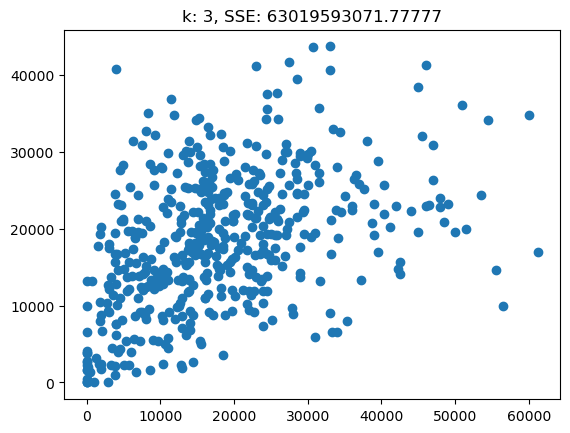

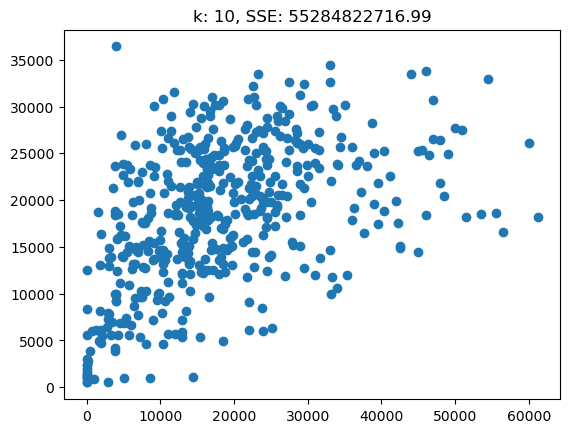

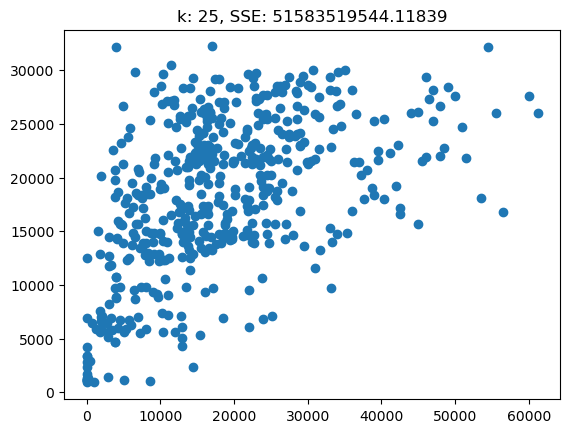

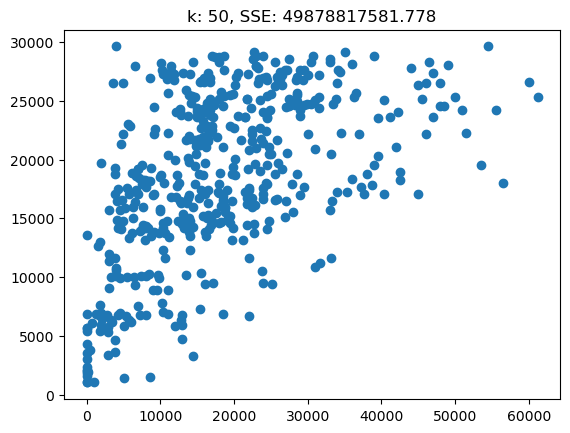

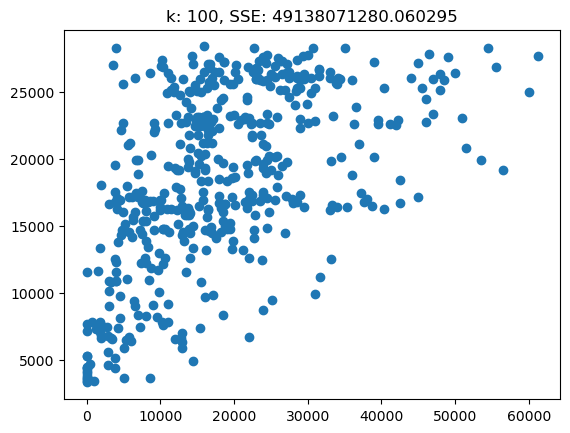

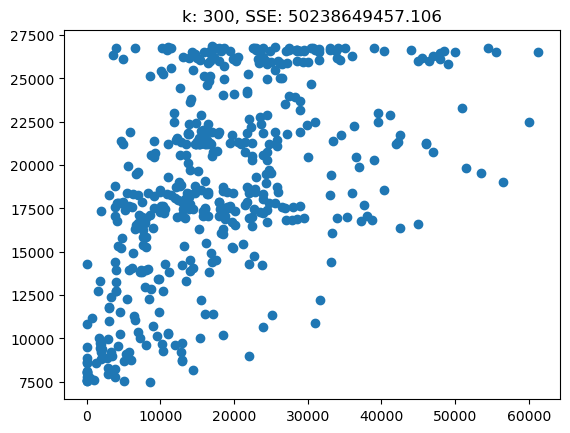

In [4]:
# import scikit kNN model
from sklearn.neighbors import KNeighborsRegressor

# function creates model with k = N
def kNN(k):
    # creates the model
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,Y_train)
    
    # computes mean squared error of test data
    Y_hat = fitted_model.predict(X_test)
    sse_test = np.sum((Y_test-Y_hat)**2)
    
    # makes scatterplot of test against predicted
    plt.scatter(Y_test,Y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(sse_test))
    plt.show()
    
kNN(3)
kNN(10)
kNN(25)
kNN(50)
kNN(100)
kNN(300)

5. Determine the optimal $k$ for these data.

[77]
48995785108.330414


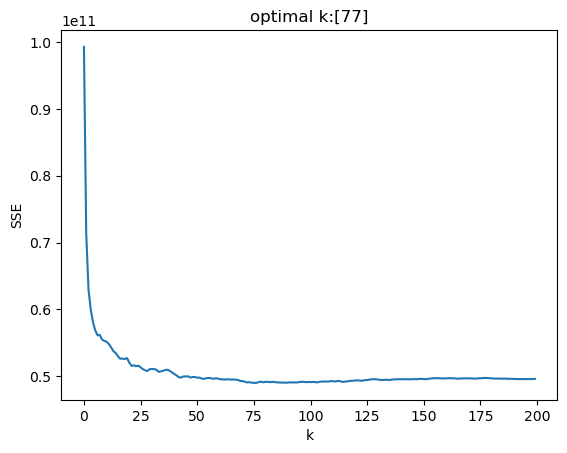

In [9]:
k_bar = 200 # number of k values to try
SSE = np.zeros(k_bar) # initial full array to save run-time

for k in range(k_bar):
    # creates the model, k+1 because k is [0,200)
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,Y_train)
    
    # computes mean squared error of test data
    Y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((Y_test-Y_hat)**2)

# Finds k value with the lowest SSE
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0] + 1
print(k_star)
print(SSE_min)

# plot the SSE for each k value
plt.plot(np.arange(0,k_bar),SSE)
plt.title("optimal k:"+str(k_star))
plt.xlabel("k")
plt.ylabel('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

> The ideal K is 77. For the K below that (3,10,25) the predictions were underfitted, meaning they varied greatly and individual values, including outliers, had a larger influence on the prediction. For the larger K value of 300, the model was overfitted, meaning there was not enough detail preserved to accurately represent the data. This caused the horizontal clustering of data, as outliers had less of an affect. K values near the ideal one (50,100) should be fitted fairly well and serve as the most accurate predictions of those selected k values.

**Q2.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [5]:
hdf = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv',low_memory=False)

In [6]:
hdf = hdf.drop('time',axis=1)

In [47]:
hdf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [48]:
hdf.shape

(299, 12)

> 299 rows means 299 observations, and teh count for all of the variables is 299, so no NAs exist in this data

2. Make a correlation matrix. What variables are strongly associated with a death event?


In [49]:
hdf.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


> The variables with the highest correlation are age (0.25), ejection_fraction (-0.27), and serum_creatinine (0.29). 

3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [50]:
print(hdf.loc[:,['anaemia','DEATH_EVENT']].groupby('anaemia').describe())
print(hdf.loc[:,['diabetes','DEATH_EVENT']].groupby('diabetes').describe())
print(hdf.loc[:,['high_blood_pressure','DEATH_EVENT']].groupby('high_blood_pressure').describe())
print(hdf.loc[:,['sex','DEATH_EVENT']].groupby('sex').describe())
print(hdf.loc[:,['smoking','DEATH_EVENT']].groupby('smoking').describe())
# After writing, realized that a loop would be more efficient. Brain was not braining oops

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

> DEATH_EVENT takes a higher value when an individual has anaemia or high blood pressure. For high blood pressure especailly, the percentage of death events jumps from 29% to 37%. Sex, smoking, and diabetes does not greatly impact the mean chance of a death event.

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [7]:
X = hdf[['anaemia','high_blood_pressure','age','ejection_fraction','serum_creatinine']]
Y= hdf['DEATH_EVENT']

5. Maxmin normalize all of the variables in `X`.

In [8]:
X = X.apply(maxmin)

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [9]:
# Had to look at solutions for this part, although after reading, it makes sense.
# Creates a random seed that picks indices, which stays the same across both models. Allows for a better direct comparison by controlling randomness.
np.random.seed(100) 
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
Y_train = Y.iloc[train]
X_test = X.iloc[test,:]
Y_test = Y.iloc[test]

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

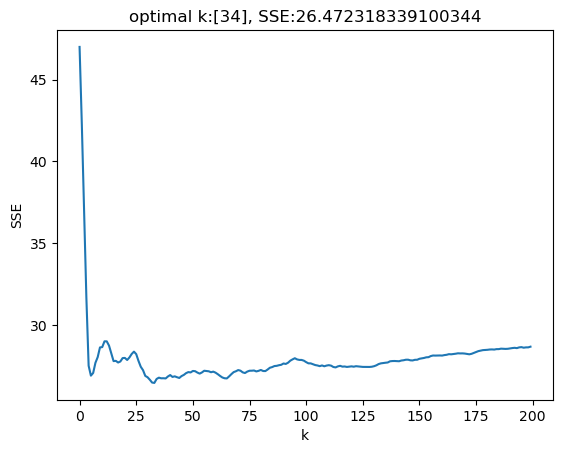

In [10]:
# basically all copied code from #1 but rewritten the same for practice
k_bar = 200 # number of k values to try
SSE = np.zeros(k_bar) # initial full array to save run-time

for k in range(k_bar):
    # creates the model, k+1 because k is [0,200)
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,Y_train)
    
    # computes mean squared error of test data
    Y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((Y_test-Y_hat)**2)

# Finds k value with the lowest SSE
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0] + 1

# plot the SSE for each k value
plt.plot(np.arange(0,k_bar),SSE)
plt.title("optimal k:"+str(k_star)+", SSE:"+str(SSE_min))
plt.xlabel("k")
plt.ylabel('SSE')
plt.show()

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [11]:
X = hdf.drop('DEATH_EVENT',axis=1)

# Also gotten from solution set, just makes sure indices are the same between both runs to remove the random test/train split
X_train = X.iloc[train,:]
Y_train = Y.iloc[train]
X_test = X.iloc[test,:]
Y_test = Y.iloc[test]

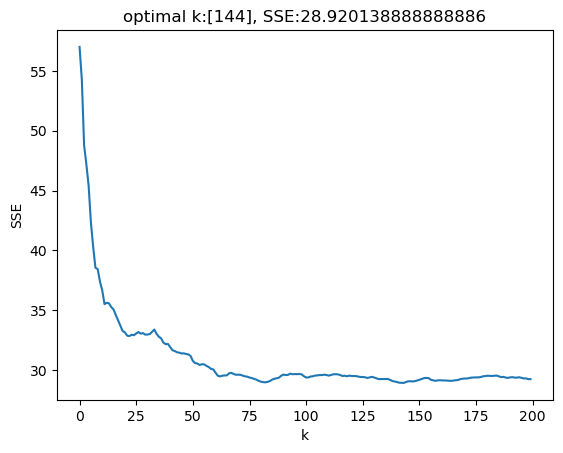

In [12]:
k_bar = 200 # number of k values to try
SSE = np.zeros(k_bar) # initial full array to save run-time

for k in range(k_bar):
    # creates the model, k+1 because k is [0,200)
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,Y_train)
    
    # computes mean squared error of test data
    Y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((Y_test-Y_hat)**2)

# Finds k value with the lowest SSE
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0] + 1

# plot the SSE for each k value
plt.plot(np.arange(0,k_bar),SSE)
plt.title("optimal k:"+str(k_star)+", SSE:"+str(SSE_min))
plt.xlabel("k")
plt.ylabel('SSE')
plt.show()

> The first model with only a few select variables has a lower SSE, although not by that much (at least with the variables I picked and the random test/train split I got). The k* value is much lower in the first one though, meaning there might be more of a discernible trend in the data. If I had to pick one, I would rather work with the smaller variable dataset as some of the filtering of low impact variables was done beforehand and patterns will be easier to spot and explain. 